# Means and anomalies

First let's import necessary modules.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

## Plotting sea surface temperature
Open and read a netCDF file.

We will use ncep realanysis2 long term mean data. Please find the data on the web and click the "*.nc" file. You can find the information on the next page. Choose OpenDAP and copy the data link.

#### Data catalog from NOAA
https://psl.noaa.gov/thredds/catalog/catalog.html

In [2]:
file_loc="http://psl.noaa.gov/thredds/dodsC/Datasets/coads/2degree/enh/"
filename1="sst.mean.nc"

with xr.open_dataset(file_loc+filename1) as ds1:      
    print(ds1)

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 180, time: 2677)
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1800-01-01 1800-02-01 ... 2023-01-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    title:                           ICOADS 2-degree Enhanced
    history:                         Release 3.0.0 (1800-2014); Release 3.0.2...
    Conventions:                     CF-1.6
    references:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   International Comprehensive Ocean-Atmosp...
    website:                         icoads.noaa.gov
    doi:                             doi:                                    ...
    source:                          NOAA National Centers for Environmental ...
    version:                         Release 3.0.0 (1800-2

In [3]:
time=ds1.time
time

<xarray.DataArray 'time' (time: 2677)>
array(['1800-01-01T00:00:00.000000000', '1800-02-01T00:00:00.000000000',
       '1800-03-01T00:00:00.000000000', ..., '2022-11-01T00:00:00.000000000',
       '2022-12-01T00:00:00.000000000', '2023-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1800-01-01 1800-02-01 ... 2023-01-01
Attributes:
    long_name:      Time
    delta_t:        0000-01-00 00:00:00
    avg_period:     0000-01-00 00:00:00
    actual_range:   [    0. 81449.]
    standard_name:  time
    axis:           T

In [4]:
ds1.time.sel(time='2022')

<xarray.DataArray 'time' (time: 12)>
array(['2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2022-12-01
Attributes:
    long_name:      Time
    delta_t:        0000-01-00 00:00:00
    avg_period:     0000-01-00 00:00:00
    actual_range:   [    0. 81449.]
    standard_name:  time
    axis:           T

In [5]:
# Let's use select the data only after 1980
sst=ds1.sst.sel(time=slice('1981','2022'))
sst

<xarray.DataArray 'sst' (time: 504, lat: 90, lon: 180)>
[8164800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01
Attributes:
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-2.8 37. ]
    units:                 degC
    precision:             2
    long_name:             Sea Surface Temperature Monthly Mean at Surface
    dataset:               ICOADS 2-degree Enhanced
    var_desc:              Sea Surface Temperature
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Individual Obs
    valid_range:           [-32765 -28265]

In [6]:
# Calculate climatology of each month
sst_clim = sst.groupby('time.month').mean(dim='time')
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 90, lon: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [ 0.,  0., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-2.8 37. ]
    units:                 degC
    precision:             2
    long_name:             Sea Surface Temperature Monthly Mean at Surface
    dataset:               ICOADS 2-degree Enhanced
    var_desc:              Sea Surface Temperature
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Individual Obs
    valid_range:           [-32765 -28265]

In [7]:
sst_anom = sst.groupby("time.month") - sst_clim
sst_anom

<xarray.DataArray 'sst' (time: 504, lat: 90, lon: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [ 0.,  0., nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 ... -83.0 -85.0 -87.0 -89.0
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

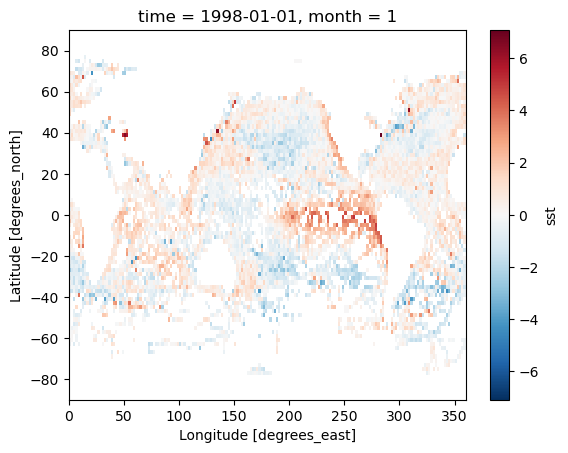

In [8]:
sst_anom.sel(time='1998-01').plot()

pcolormesh doesn't work because sst_anom.sel(time='1998-01') is a 3-D array (time,lat,lon) with ntime=1. To solve this we need to squeeze the data.

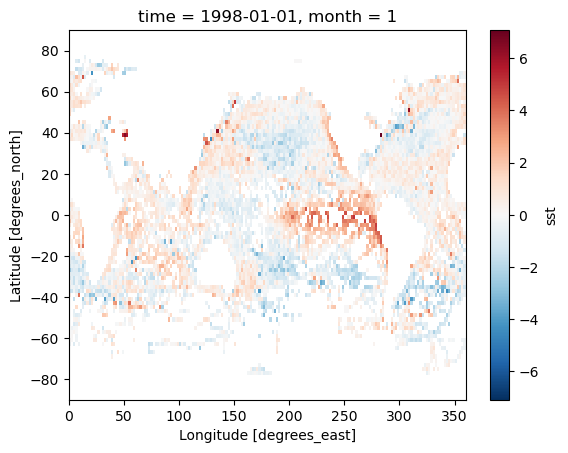

In [9]:
sst_anom.sel(time='1998-01').squeeze().plot.pcolormesh()

Text(0.5, 1.0, 'SST anomaly January 1998 (degreeC)')

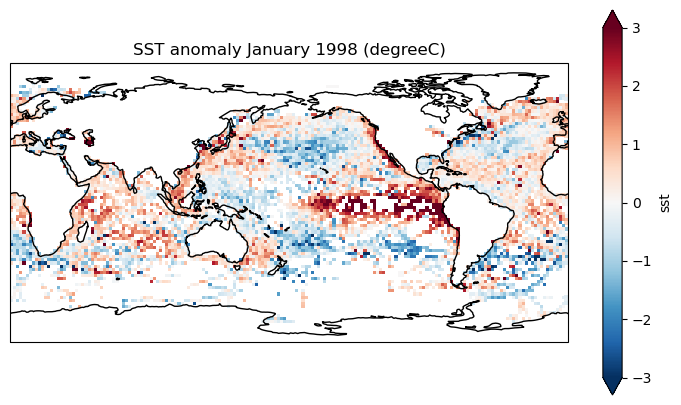

In [10]:
# Make a prettier plot.
cmap1=plt.cm.RdBu_r
proj = ccrs.PlateCarree()
fig1 = plt.figure(figsize=(9,5))
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs1=sst_anom.sel(time='1998-01').squeeze().plot.pcolormesh(ax=ax1, transform=proj, cmap=cmap1, vmax=3, vmin=-3)
ax1.coastlines()
plt.title('SST anomaly January 1998 (degreeC)')

#### Exercise
Plot SST anomaly of December 1982.

#### Exercise
Find a month that has anomalously low SST in the Eastern Pacific and make a contour plot (use pcolormesh).

Plot averge anomaly from December 1997 to February 1998.

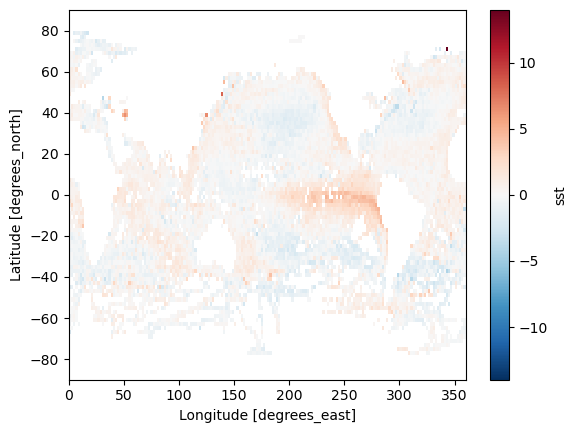

In [11]:
sst_anom.sel(time=slice('1997-12','1998-02')).mean("time").plot()

#### Exercise 
Plot averge anomaly from December 2015 to February 2016.